In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

import warnings
warnings.filterwarnings("ignore")


In [ ]:
# load dataset
df_playtennis = pd.read_csv("PlayTennis.csv")
df_playtennis

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [ ]:
#split dataset in features and target variable
feature_cols=['Outlook','Temperature','Humidity','Wind']
X = df_playtennis[feature_cols] # Features
y = df_playtennis['Play Tennis'] # Target variable



In [ ]:
#OOps... the sklearn DecisionTreeClassifier() doesn't work on categorical data, let's do some encoding
# X['Outlook']= X['Outlook'].replace({'Rain':30, 'Sunny':20, 'Overcast':10}, inplace=False)
# X['Temperature']= X['Temperature'].replace({'Hot':30, 'Cool':20, 'Mild':10}, inplace=False)
# X['Humidity']= X['Humidity'].replace({'High':1, 'Normal':0}, inplace=False)
# X['Wind']= X['Wind'].replace({'Strong':1, 'Weak':0}, inplace=False)
X=pd.get_dummies(X)



In [ ]:
X


,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Wind_Strong,Wind_Weak
0,0,0,1,0,1,0,1,0,0,1
1,0,0,1,0,1,0,1,0,1,0
2,1,0,0,0,1,0,1,0,0,1
3,0,1,0,0,0,1,1,0,0,1
4,0,1,0,1,0,0,0,1,0,1
5,0,1,0,1,0,0,0,1,1,0
6,1,0,0,1,0,0,0,1,1,0
7,0,0,1,0,0,1,1,0,0,1
8,0,0,1,1,0,0,0,1,0,1
9,0,1,0,0,0,1,0,1,0,1


In [ ]:
model=DecisionTreeClassifier(criterion='entropy')
model.fit(X,y)
y_predict=model.predict(X)
print(metrics.accuracy_score(y,y_predict))

1.0


In [ ]:
print(y.ravel())
print(y_predict.ravel())

['No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'No']
['No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'No']


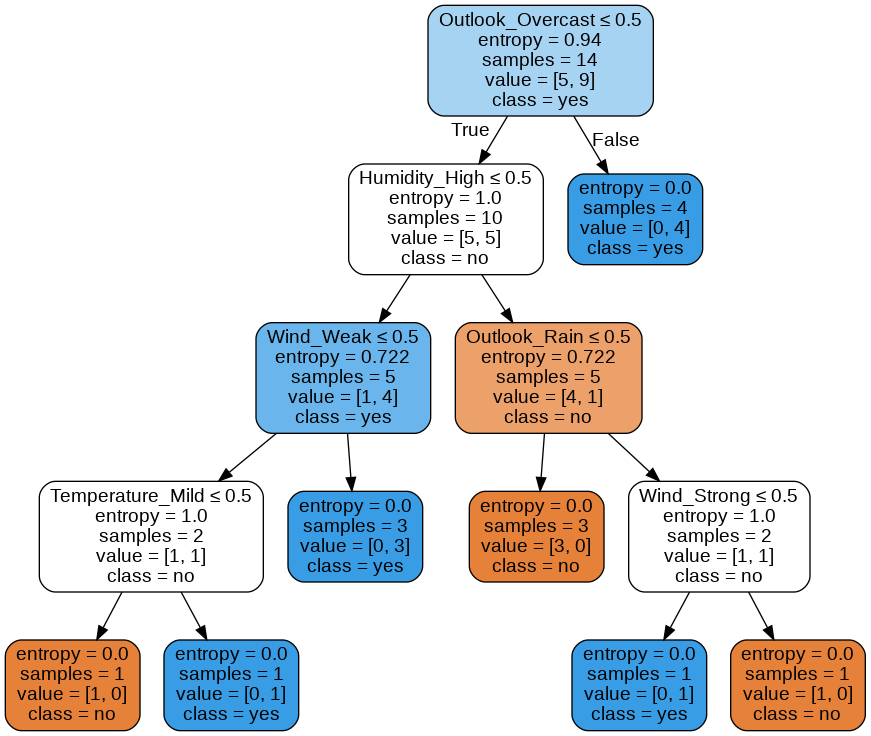

In [ ]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['no','yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('playtennis.png')
Image(graph.create_png())

**How to read the tree?**

 

*   If the Outlook=Overcast, then class=Yes <br>
(Outlook_Overcast<=0.5 False)
*   If the Outlook= not Overcast, and <br>
    If Humidity=High and Outlook=Not Rain, then class=No <br>
(Outlook_Overcast<=0.5 True, Humidity_High<=0.5 False, Outlook_Rain<=0.5 True, the leaf=No [3,0])





**How to predict a new value?**

For example:
Outlook=sunny,
temperature=hot,
humidity=high,
wind=weak


In [ ]:
X_test =pd.DataFrame({'Outlook_Overcast':[0],
                      'Outlook_Rain':[0],
                      'Outlook_Sunny':[1],
                      'Temperature_Cool':[0],
                      'Temperature_Hot':[1],
                      'Temperature_Mild':[0],
                      'Humidity_High':[1],
                      'Humidity_Normal':[0],
                      'Wind_Strong':[0],
                      'Wind_Weak':[1]
                      })

y_predict= model.predict(X_test)
print(y_predict)

['No']


# **Your task**<br>

Conduct a mini research on:
1.   What is Information Gain?
2.   What is Entropy?
3.   Why Decision Tree (ID3) use these metrics?
4.   Advantages & Disadvantages of Decision Trees?
5.   When do you think Decision Tree will be better than any other method?
6.   Find out what is CART decision tree?


Work with a toy dataset
1.  Find a small toy dataset 
2.  Pick a sample of new data and show what is the predicted class. 
3.  How to interpret your tree?



